In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
trained = 'trained'
#name = 'LOC_conv5_subj001'

subjects = ['subj001']
rois = ['LOC', 'PPA', 'EVC']
layers = ['conv5', 'fc6']

subj_rdm = []
rand_rdm = []

for subj in subjects:
    for roi in rois:
        for layer in layers:
            name = roi + '_' + layer + '_' + subj
            weight = np.load(os.path.join(name) + '.npy')
            subj_rdm.append(weight)
            #scaffold = np.load(os.path.join(name) + '.npy')
            fmri_mean = np.mean(weight, axis=0)
            fmri_cov = np.cov(weight, rowvar=False)
            random_weight = np.random.multivariate_normal(fmri_mean, fmri_cov, (weight.shape[0]))
            #random_weight_unmatched = np.random.rand(weight.shape[0], weight.shape[1])
            rand_rdm.append(random_weight)
            np.save(name + '_random', random_weight)
            #np.save(name + '_random_unmatched', random_weight_unmatched)
            

In [7]:
print(subj_rdm)    

[array([[ 2.13223000e-04, -1.28698870e-04, -6.40554586e-04, ...,
        -4.98958580e-05, -9.53368581e-05, -1.30759567e-04],
       [ 2.62350339e-04, -6.71779053e-05, -3.97613010e-04, ...,
         7.61524570e-05, -5.82358407e-05, -1.90400038e-04],
       [-1.52454624e-04, -1.95937682e-04, -6.11882890e-04, ...,
         5.00894639e-05, -2.65292823e-04, -2.33064056e-04],
       ...,
       [-1.79158451e-04, -1.90269988e-04, -1.19356031e-03, ...,
        -1.43820289e-04, -3.66778520e-04, -1.87010126e-04],
       [-2.06827506e-04, -2.01596573e-04, -8.60791246e-04, ...,
        -1.88614122e-05, -1.81103460e-04, -1.87999703e-05],
       [-1.51945467e-04, -1.89684579e-04, -9.38980898e-04, ...,
        -1.19949866e-04, -2.80556094e-04, -1.15599301e-04]], dtype=float32), array([[-2.4527675e-04,  1.0793846e-03, -1.9155872e-03, ...,
        -1.0862059e-03,  5.7608343e-04, -1.4204589e-03],
       [-3.4572932e-04,  1.1728514e-03, -1.9564847e-03, ...,
        -1.0770377e-03,  1.2965271e-03, -1.5928

In [14]:
subj_rdm_np = np.zeros((6, 195))
for i in range(6):
    subj_rdm_np[i, :] = np.array(subj_rdm[i])

print(subj_rdm_np)

ValueError: could not broadcast input array from shape (195,12544) into shape (195)

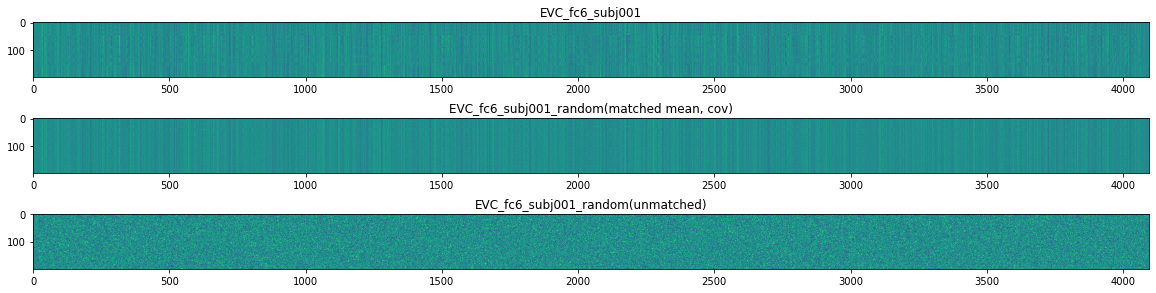

In [38]:
fig = plt.figure(figsize = (20, 5))
ax1 = fig.add_subplot(311)
ax1.imshow(weight) #
ax1.set_title(name)
ax2 = fig.add_subplot(312)
ax2.imshow(random_weight) # cmap=cm.Greys_r
ax2.set_title(name + '_random(matched mean, cov)')
ax3 = fig.add_subplot(313)

random_weight_unmatched = np.random.rand(weight.shape[0], weight.shape[1])
ax3.imshow(random_weight_unmatched) # cmap=cm.Greys_r
ax3.set_title(name + '_random(unmatched)')
plt.show()


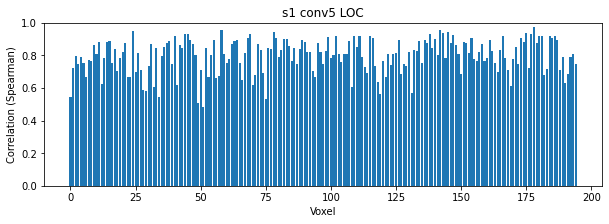

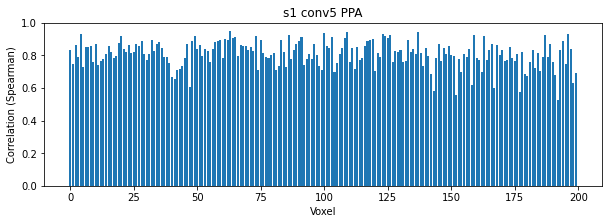

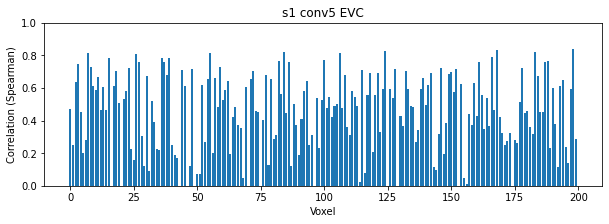

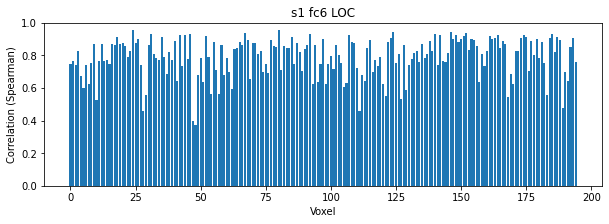

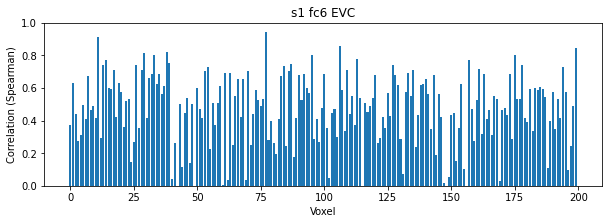

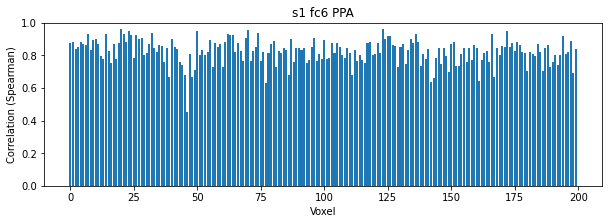

In [54]:
from scipy import stats
real_beta = subj_rdm[0]
random_beta = rand_rdm[0]
corr = []
for voxel in range(0, len(real_beta)):
    rho, pval = stats.spearmanr(real_beta[voxel], random_beta[voxel])
    corr.append(rho)

fig = plt.figure(figsize = (10, 3))
plt.xlabel('Voxel')
plt.ylabel('Correlation (Spearman)')
plt.title('s1 conv5 LOC')
plt.bar(range(0,195), corr)
plt.ylim(0, 1)
plt.show()

real_beta = subj_rdm[2]
random_beta = rand_rdm[2]
corr = []
for voxel in range(0, len(real_beta)):
    rho, pval = stats.spearmanr(real_beta[voxel], random_beta[voxel])
    corr.append(rho)

fig = plt.figure(figsize = (10, 3))
plt.bar(range(0,len(real_beta)), corr)
plt.ylim(0, 1)
plt.xlabel('Voxel')
plt.ylabel('Correlation (Spearman)')
plt.title('s1 conv5 PPA')
plt.show()

real_beta = subj_rdm[4]
random_beta = rand_rdm[4]
corr = []
for voxel in range(0, len(real_beta)):
    rho, pval = stats.spearmanr(real_beta[voxel], random_beta[voxel])
    corr.append(rho)

fig = plt.figure(figsize = (10, 3))
plt.bar(range(0,len(real_beta)), corr)
plt.ylim(0, 1)
plt.xlabel('Voxel')
plt.ylabel('Correlation (Spearman)')
plt.title('s1 conv5 EVC')
plt.show()


real_beta = subj_rdm[1]
random_beta = rand_rdm[1]
corr = []
for voxel in range(0, len(real_beta)):
    rho, pval = stats.spearmanr(real_beta[voxel], random_beta[voxel])
    corr.append(rho)

fig = plt.figure(figsize = (10, 3))
plt.bar(range(0,len(real_beta)), corr)
plt.ylim(0, 1)
plt.xlabel('Voxel')
plt.ylabel('Correlation (Spearman)')
plt.title('s1 fc6 LOC')
plt.show()


real_beta = subj_rdm[5]
random_beta = rand_rdm[5]
corr = []
for voxel in range(0, len(real_beta)):
    rho, pval = stats.spearmanr(real_beta[voxel], random_beta[voxel])
    corr.append(rho)

fig = plt.figure(figsize = (10, 3))
plt.bar(range(0,len(real_beta)), corr)
plt.ylim(0, 1)
plt.xlabel('Voxel')
plt.ylabel('Correlation (Spearman)')
plt.title('s1 fc6 EVC')
plt.show()


real_beta = subj_rdm[3]
random_beta = rand_rdm[3]
corr = []
for voxel in range(0, len(real_beta)):
    rho, pval = stats.spearmanr(real_beta[voxel], random_beta[voxel])
    corr.append(rho)

fig = plt.figure(figsize = (10, 3))
plt.bar(range(0,len(real_beta)), corr)
plt.ylim(0, 1)
plt.xlabel('Voxel')
plt.ylabel('Correlation (Spearman)')
plt.title('s1 fc6 PPA')
plt.show()

In [24]:
print(corr)

[0.543271090867506, 0.7196876620414239, 0.7953345122661131, 0.7495702528871947, 0.7869862415332995, 0.7508680312193251, 0.6695283826183271, 0.7732699901193081, 0.7640582630689652, 0.8613530057011315, 0.8101613499509032, 0.8801021093472253, 0.6246020012488861, 0.7819412525185985, 0.8847760882545789, 0.8866147609389735, 0.7555835436130272, 0.8408287044283198, 0.701158868179157, 0.784063055916687, 0.8220110702709453, 0.8726146699950348, 0.6701903361474519, 0.6657082897089815, 0.9491197981880551, 0.6989026458903628, 0.8148921870688938, 0.7102273792962632, 0.5894034972720299, 0.5804849831471869, 0.7349511650145089, 0.869303770574631, 0.6044530813728692, 0.8440854624832169, 0.5440589142163644, 0.7962864237637604, 0.8517359179331131, 0.8743969445188736, 0.8888707371468418, 0.746782446834343, 0.9157980363717426, 0.6166092092808929, 0.8663143006569709, 0.846264586143403, 0.9311685237746758, 0.9314006864249224, 0.8938657429816643, 0.8708559065328819, 0.7990065951913555, 0.5089840998887285, 0.712

In [52]:
import pandas as pd

subj_rdm_ = np.zeros((6, 6))
rand_rdm_ = np.zeros((6, 6))

#df = pd.DataFrame(subj_rdm, columns=['s1_LOC_conv5', 's1_LOC_fc6', 's1_PPA_conv5', 's1_PPA_fc6', 's1_EVC_conv5', 's1_EVC_fc6']) # 's2_LOC_conv5', 's2_LOC_fc6', 's2_PPA_conv5', 's2_PPA_fc6', 's2_EVC_conv5', 's2_EVC_fc6', 
#subj_rdm_ = df.corr(method='spearman')

for idx in range(1):
    for comp in range():
        idx_beta = subj_rdm[idx]
        comp_beta = subj_rdm[comp]
        for voxel in range(0, len(subj_rdm[idx])):
            rho, p = stats.spearmanr(idx_beta[voxel], comp_beta[voxel], nan_policy='omit')
            print(rho)
            #rand_rdm_[idx, comp] = stats.spearmanr(np.array(rand_rdm[idx]), np.array(rand_rdm[comp]), nan_policy='omit')
            

0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.999999

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 12544 and the array at index 1 has size 4096

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(subj_rdm_)
ax2 = fig.add_subplot(122)
ax2.imshow(rand_rdm_)
plt.show()
